Social network advertising, also social media targeting, is a group of terms that are used to describe forms of online advertising/digital marketing that focus on social networking services. One of the major benefits of this type of advertising is that advertisers can take advantage of the users' demographic information and target their ads appropriately.

Social media targeting combines current targeting options (such as geotargeting, behavioral targeting, socio-psychographic targeting, etc.), to make detailed target group identification possible. With social media targeting, advertisements are distributed to users based on information gathered from target group profiles.

Social network advertising is not necessarily the same as social media targeting. Social media targeting is a method of optimizing social media advertising by using profile data to deliver advertisements directly to individual users. Social network advertising refers to the process of matching social network users to target groups that have been specified by the advertiser. Social media advertising involves creating content on social media platforms, engaging with followers, and running social media advertisements.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Social_network_advertising)

For this assignment, we will take a look at how Social Network pick who to advertise using k-Nearest Neighbor algorithm. We will leverage the [Social Network Ads dataset](https://www.kaggle.com/rakeshrau/social-network-ads).

First, let's import the data

# Learning Objectives
- Define basic terminology of machine learning.
- Describe a typical machine learning modeling process.
- Demonstrate the ability to use K-Nearest Neighbor algorithm.
- Demonstrate the ability to tweak K-Nearest Neighbor algorithm.
- Demonstrate the ability to determine the accuracy of a model.

In [1]:
import numpy as np
import pandas as pd
SNA = pd.read_csv('./Social_Network_Ads.csv')

C:\Users\louis\AppData\Local\Temp\ipykernel_8572\3192749037.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Question 1: Print the top 10 rows of the dataset

In [2]:
SNA.head(10)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Question 1.2: Drop the User Id column from the SNA dataframe using [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method

In [3]:
SNA.drop('User ID', axis=1, inplace=True)
SNA.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


Question 2.1: Within the Gender column, replace the text Male and Female with 0 and 1 respectively. You can use [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method.

In [4]:
SNA['Gender'] = SNA['Gender'].replace({'Male': 0, 'Female': 1})


C:\Users\louis\AppData\Local\Temp\ipykernel_8572\2509744264.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SNA['Gender'] = SNA['Gender'].replace({'Male': 0, 'Female': 1})


Question 2.2: Check if successful by printing top 10 rows

In [5]:
SNA.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
5,0,27,58000,0
6,1,27,84000,0
7,1,32,150000,1
8,0,25,33000,0
9,1,35,65000,0


As part of any machine learning problem, we need to explore the data and perform exploratory data analysis. For the next set of questions, we will be using [seaborn](https://seaborn.pydata.org/index.html) library for visualization.

Question 3.1: Using Seaborn [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), create three pairwise scatter plots using Purchased column as hue for the following pairs:
1. Age & EstimatedSalary
2. Age & Gender
3. Gender & EstimatedSalary

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

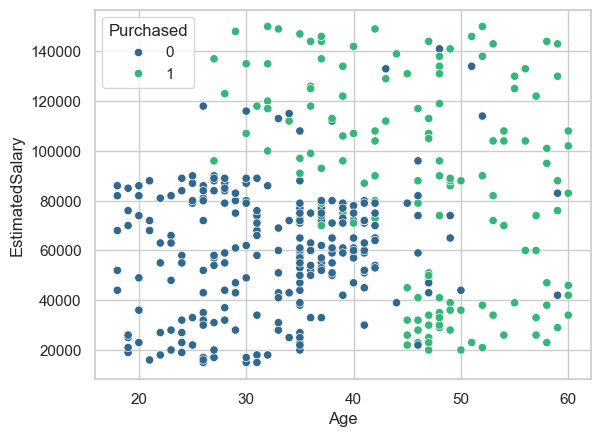

In [18]:
import seaborn as sns
sns.set_style("whitegrid")
sns.scatterplot(data=SNA, x="Age", y="EstimatedSalary", hue="Purchased",palette="viridis")

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

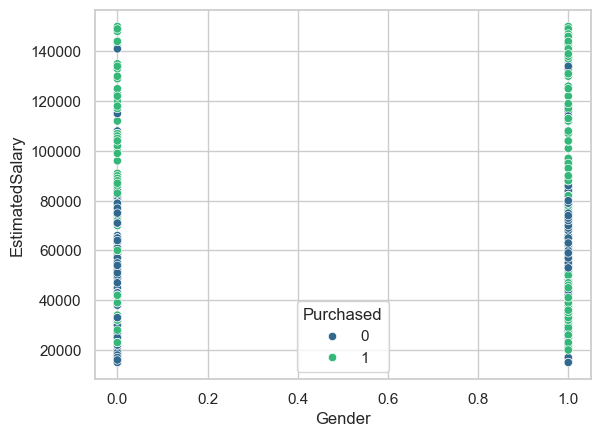

In [17]:
sns.scatterplot(data=SNA, x="Gender", y="EstimatedSalary", hue="Purchased", palette="viridis")

<Axes: xlabel='Age', ylabel='Gender'>

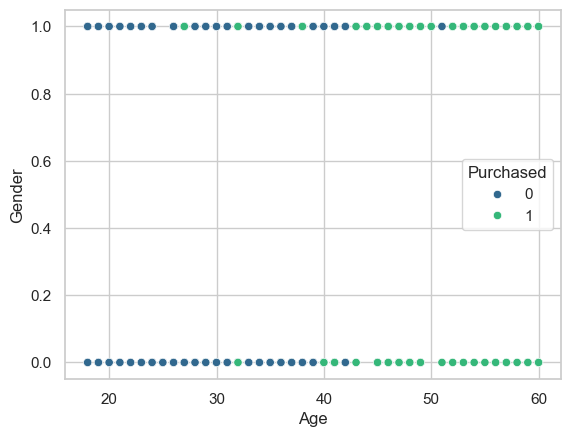

In [19]:
sns.scatterplot(data=SNA, x="Age", y="Gender", hue="Purchased", palette="viridis")

Question 3.2: Based on the above plots, which feature(s) can be best used to determine if a person will purchase an item based on Ad? 

It seems that the plot for Age/Estimated Salary show the best correlation between:
High age and buying the product
Higher salary and buying the product. 
(IE there is a higher probability of sales happen when both those factors are true)

Age & EstimatedSalary

Question 3.3: Use histogram plots to validate your answer. Set the Hue to be 'Purchased'

<Axes: xlabel='Age', ylabel='Count'>

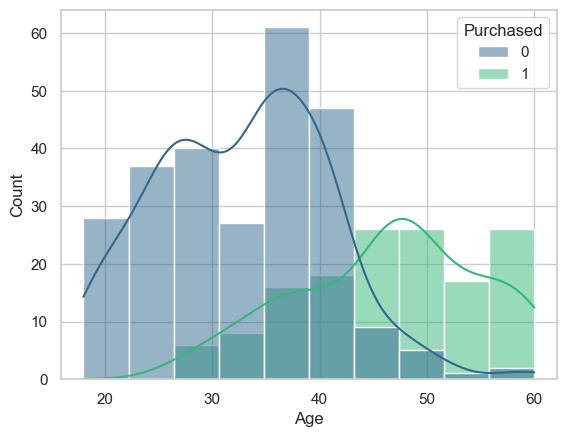

In [15]:
# Plot histogram for Age
sns.histplot(data=SNA, x="Age", hue="Purchased", kde=True, palette="viridis")

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

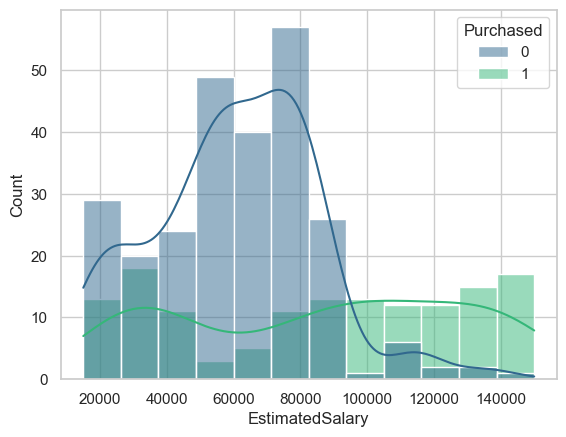

In [20]:
sns.histplot(data=SNA, x="EstimatedSalary", hue="Purchased", kde=True, palette="viridis")

Question 4: Now that we have performed data exploration, lets experiment with k-NN algorithm. But first, we need to split the data into training and testing set. To perform this task, you can use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a 70/30 split for training and test data respectively.

In [82]:
from sklearn.model_selection import train_test_split
x = SNA
y = SNA['Purchased']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)




Question 5.1: Using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), write a k-NN classifier with n=2

In [83]:
from sklearn.neighbors import KNeighborsClassifier

# Per the docs, p=2 is equivalent to using the euclidean distance metric
# when p=1 this is equivalent to using the manhattan distance metric
model = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)

model2 = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
model.fit(x_train, y_train)
model2.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

Using [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), evaluate and print the classifier output

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict the labels for the test data
y_pred = model.predict(x_test)
y_pred2 = model2.predict(x_test)

# Print the classification report
print("Classification Report: ", classification_report(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred2))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

# Calculate and print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred2))

Classification Report:                precision    recall  f1-score   support

           0       0.71      0.96      0.82        72
           1       0.87      0.42      0.56        48

    accuracy                           0.74       120
   macro avg       0.79      0.69      0.69       120
weighted avg       0.77      0.74      0.72       120

Classification Report:                precision    recall  f1-score   support

           0       0.71      0.96      0.82        72
           1       0.87      0.42      0.56        48

    accuracy                           0.74       120
   macro avg       0.79      0.69      0.69       120
weighted avg       0.77      0.74      0.72       120

Confusion Matrix:
 [[69  3]
 [28 20]]
Confusion Matrix:
 [[69  3]
 [28 20]]
Accuracy Score: 0.7416666666666667
Accuracy Score: 0.7416666666666667


I only added the 2nd model above with model and model2 to confirm docs that say when minkowski is set to p=2, it's the same as euclidean. Results seem to confirm this.

In [127]:
# NOTE: I had the below code in the same python section as my loop that iterates
# through the different values of k. I moved it here since splitting the data 
# every run, resulted in different plots. I wanted to keep the plots consistent
SNA = pd.read_csv('./Social_Network_Ads.csv') # Re-load the data
SNA['Gender'] = SNA['Gender'].replace({'Male': 0, 'Female': 1})
x = SNA                 # Features
y = SNA['Purchased']    # Target variable (or Labels)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

C:\Users\louis\AppData\Local\Temp\ipykernel_8572\1722904230.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SNA['Gender'] = SNA['Gender'].replace({'Male': 0, 'Female': 1})


Question 5.2: What happens when you increase the value of k from 2 to 10. Iterate over k from 2 to 10, build and evaluate the different KNeighborsClassifier

0.7583333333333333


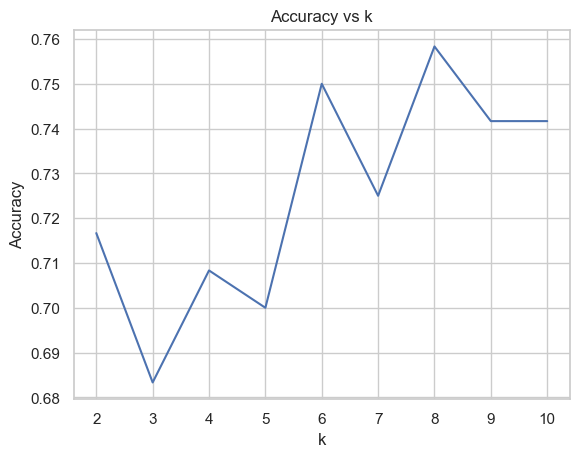

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_scores = []
for i in range(2, 11):
    model = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

print(max(accuracy_scores))
# Plot the accuracy scores
sns.lineplot(x=range(2, 11), y=accuracy_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()



Question 5.3: What happened to the accuracy of the classifier at k>9 and why?

Accuracy decreased however, from the above chart, it decreased at k>8. I assume accuracy decreased at k>8 due to overfitting

Question 6.2: Now try eliminating one of the features (Gender) from the data set.

In [117]:
SNA = pd.read_csv('./Social_Network_Ads.csv') # Re-load the data
x = SNA[['Age', 'EstimatedSalary']] # Now just look at the features we had identified as being "important
y = SNA['Purchased']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Question 6.2: Perform the same task from question 5.2 with the updated data

[0.7083333333333334, 0.75, 0.7833333333333333, 0.8, 0.7833333333333333, 0.8, 0.7916666666666666, 0.8083333333333333, 0.775]


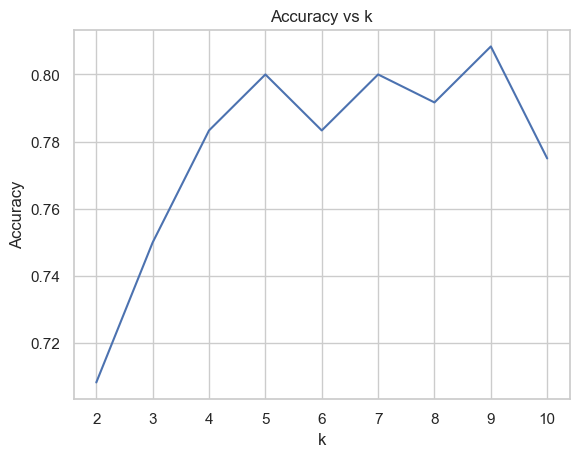

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_scores = []
for i in range(2, 11):
    model = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

print(max(accuracy_scores))
# Plot the accuracy scores
sns.lineplot(x=range(2, 11), y=accuracy_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

Question 6.3: What happened to the results? What's your conclusion? Plot accuracy vs k.

In the final results accuracy went up quite a bit compared with when training data with Gender included.
Also highest accuracy was at k=9 at 80.83% accuracy (previous highest as k=6 and 76.6%)

Question 7: Repeat steps 6.1-6.3 with another distance metric. Comment on what happens to the results?

In [130]:
SNA = pd.read_csv('./Social_Network_Ads.csv') # Re-load the data
x = SNA[['Age', 'EstimatedSalary']] # Now just look at the features we had identified as being "important
y = SNA['Purchased']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

0.6583333333333333


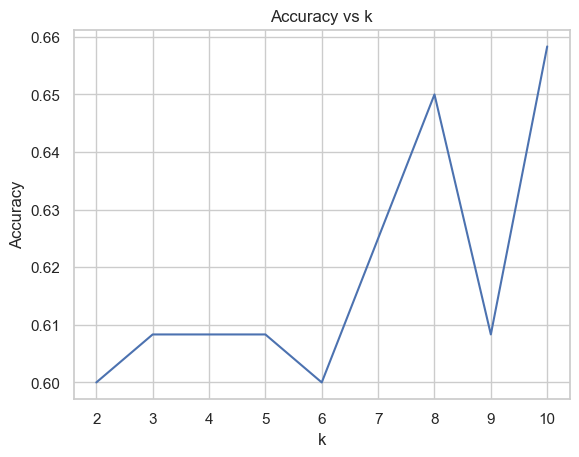

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_scores = []
for i in range(2, 11):
    # Trying with a different metric. This time using the cosine distance metric
    model = KNeighborsClassifier(n_neighbors=i, metric='cosine', p=2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

print(max(accuracy_scores))
# Plot the accuracy scores
sns.lineplot(x=range(2, 11), y=accuracy_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

I tried the same training set as in 6.2 so the features were Age and Salary and the label data was the Purchased column.
I used the "cosine" distance metric. The plot is above. Accuracy did much worse. max accuracy was .6 (over a 10% drop in accuracy)

0.6


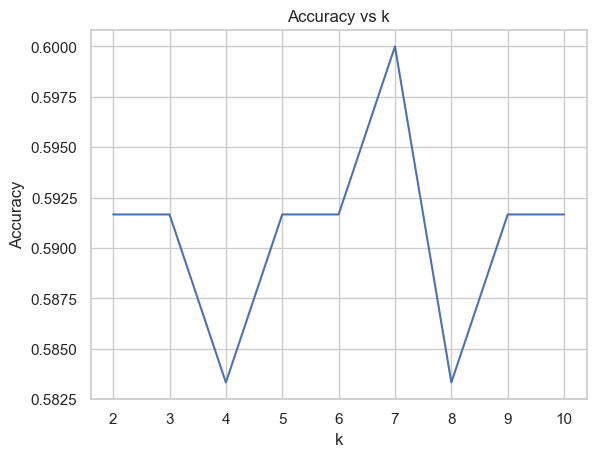

In [150]:
SNA = pd.read_csv('./Social_Network_Ads.csv') # Re-load the data
x = SNA[['Age', 'EstimatedSalary']] # Now just look at the features we had identified as being "important
y = SNA['Purchased']

# All valid distance metrics per exception from code:
# {'l1', 'russellrao', 'sokalsneath', 'infinity', 'dice', 'mahalanobis', 
# 'manhattan', 'precomputed', 'sqeuclidean', 'braycurtis', 'chebyshev', 
# 'haversine', 'correlation', 'canberra', 'euclidean', 'jaccard', 'pyfunc', 
# 'p', 'nan_euclidean', 'l2', 'sokalmichener', 'cosine', 'cityblock', 
# 'rogerstanimoto', 'hamming', 'seuclidean', 'minkowski', 'yule'}

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

import seaborn as sns
import matplotlib.pyplot as plt

accuracy_scores = []
for i in range(2, 11):
    # Trying with a different metric. This time using the cosine distance metric
    model = KNeighborsClassifier(n_neighbors=i, metric='cosine', p=2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

print(max(accuracy_scores))
# Plot the accuracy scores
sns.lineplot(x=range(2, 11), y=accuracy_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()